In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV

In [2]:
df_tr_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph1_bytime.csv", encoding='cp949')
df_ts_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_in.csv", encoding='cp949')
df_ts_2 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_out.csv", encoding='cp949')

In [3]:
df_tr = df_tr_1.replace('Normal', 0)
df_ts_1 = df_ts_1.replace('정상', 0)
df_ts_1 = df_ts_1.replace('이상', 1)
df_ts_2 = df_ts_2.replace('정상', 0)
df_ts_2 = df_ts_2.replace('이상', 1)

In [4]:
df_tr_1 = df_tr_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_1 = df_ts_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_2 = df_ts_2.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})

In [7]:
df_tr = df_tr_1.iloc[:, 7:49] # train
df_ts = pd.concat([df_ts_1.iloc[:,7:49], df_ts_2.iloc[:,7:49]])
df_tr_x = df_tr.iloc[:,:-1]
df_ts_x = df_ts.iloc[:,:-1]

In [8]:
df_tr_x = df_tr_x.reset_index(drop = True)
df_tr_x = np.array(df_tr_x)
df_ts_x = df_ts_x.reset_index(drop = True)
df_ts_x = np.array(df_ts_x)

In [27]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.5)

In [28]:
clf.fit(df_tr_x)

LocalOutlierFactor(contamination=0.5, n_neighbors=10)

In [29]:
clf.fit_predict(df_ts_x)

array([ 1, -1,  1, ...,  1,  1,  1])

In [30]:
x_score = clf.negative_outlier_factor_

(-6.0, 0.5)

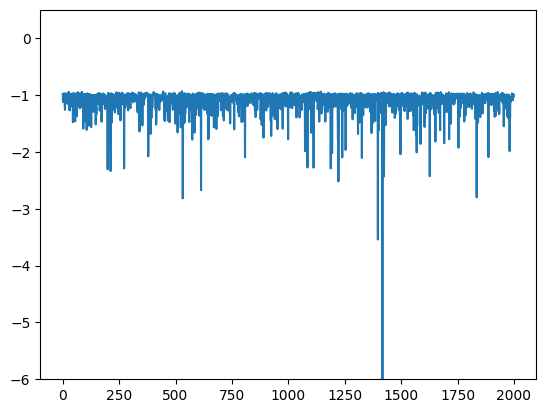

In [31]:
plt.plot(x_score)
plt.ylim(-6,0.5)

In [40]:
from collections import Counter

In [49]:
np.where(x_score < -1.5)

(array([  91,  106,  115,  126,  146,  199,  208,  212,  272,  340,  353,
         379,  390,  414,  500,  509,  510,  523,  532,  536,  574,  584,
         613,  644,  646,  670,  681,  760,  808,  882,  890,  924,  952,
         975,  999, 1074, 1076, 1085, 1101, 1112, 1188, 1194, 1220, 1222,
        1239, 1254, 1309, 1326, 1369, 1397, 1401, 1417, 1424, 1432, 1497,
        1556, 1567, 1569, 1583, 1586, 1604, 1627, 1652, 1673, 1691, 1713,
        1721, 1754, 1835, 1887, 1955, 1981], dtype=int64),)